# Esercitazione 2

## Esercizio 2.1



### Punto 1

Calcolo l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ campionando x da una distribuzione uniforme in [0,1), utilizzando un metodo MC.

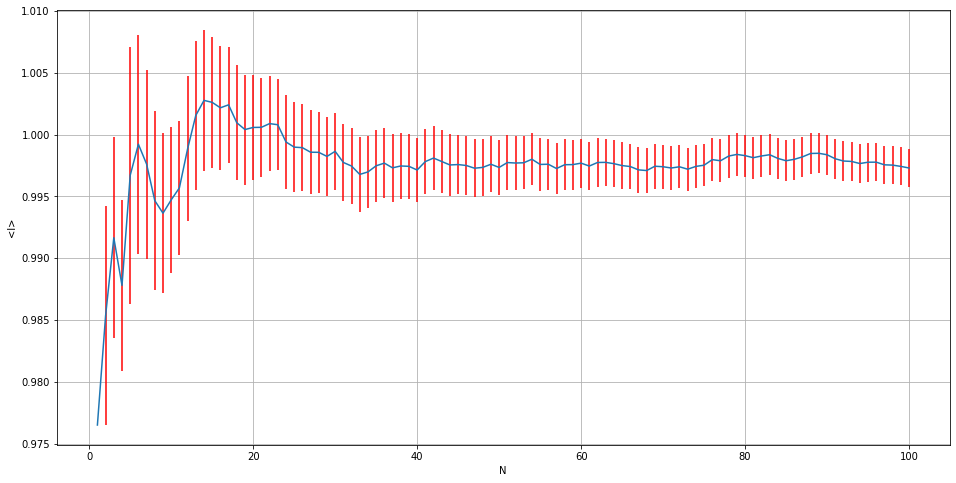

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nblocks,unif,var_unif = np.loadtxt("es02_1/es1.out", usecols=(0,1,2) , delimiter=',', unpack='true')

plt.figure(figsize=(16,8))
plt.errorbar(Nblocks,unif,yerr=var_unif**0.5, ecolor='red')
plt.xlabel('N')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

Osservo come la stima dell'integrale, dopo le significative fluttuazioni nei primi blocchi, si assesti sul valore atteso di $1$.

Ora procedo con l'analisi della deviazione standard, per la quale l'andamento atteso è  $\sigma \propto \frac{1}{N}$, eseguo quindi un fit con una funzione di questo tipo, dopo aver trovato la costante di moltiplicazione migliore.

The fit returns a constant a = 0.013788801503610726


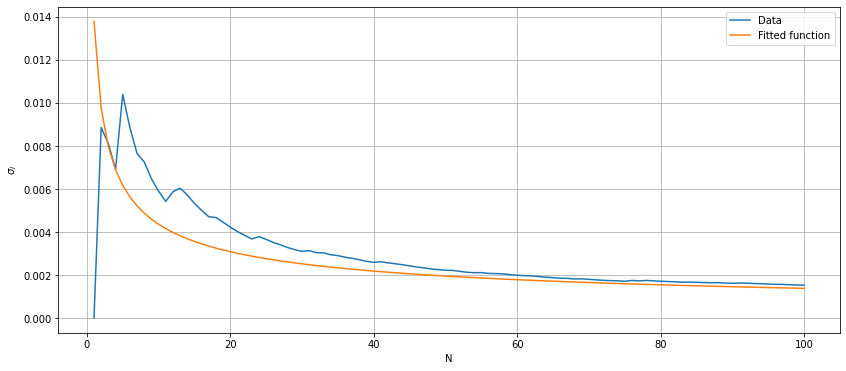

In [2]:
from scipy.stats import expon
from scipy import optimize

#creating an exponential test function, used to fit the variance
def test_func(N, a):
    return a/np.sqrt(N)

#best fit for the params of the test func
params, params_covariance = optimize.curve_fit(test_func, Nblocks, var_unif**0.5) 
print ('The fit returns a constant a =', params[0])

plt.figure(figsize=(14,6))
plt.plot(Nblocks,var_unif**0.5, label='Data')
plt.xlabel('N')
plt.ylabel('$\sigma_I$')
plt.grid(True)

plt.plot(Nblocks, test_func(Nblocks, params[0]),label='Fitted function')
plt.legend(loc='best')

plt.show()

L'andamento dei dati risulta effettivamente simile a quello di una funzione $f(N) = \frac{0.005}{N}$.

### Punto 2

Ora campiono _x_ utilizzando l'importance sampling: $I = \int_0^1 g(x)p(x) dx$. 

Come distribuzione di probabilità simile a $\cos(\pi x/2)$, considero la funzione $$y = \frac{1}{N} (1 - x) = p(x)$$

Ricavo quindi la normalizzazione N di tale funzione: $\int_0^1 p(x)dx = \frac{1}{2}$ = N $\Rightarrow p(x) = 2 (1- x)$. 

Ho così ottenuto anche l'espressione per g: $$g(x) = \frac{\pi}{2} \frac{\cos(\pi \frac{x}{2})}{(2-2x)}$$

Con il metodo dell'inversa ottengo $x^2 - 2x + y = 0$; risolvendo per x e selezionando la radice che cade nel dominio arrivo a $x = 1-\sqrt{1-y}$. La distribuzione usata per campionare x risulta quindi essere: $x = 1-\sqrt{ (1-r)}$, dove r è una variabile random uniforme in $[0,1)$.

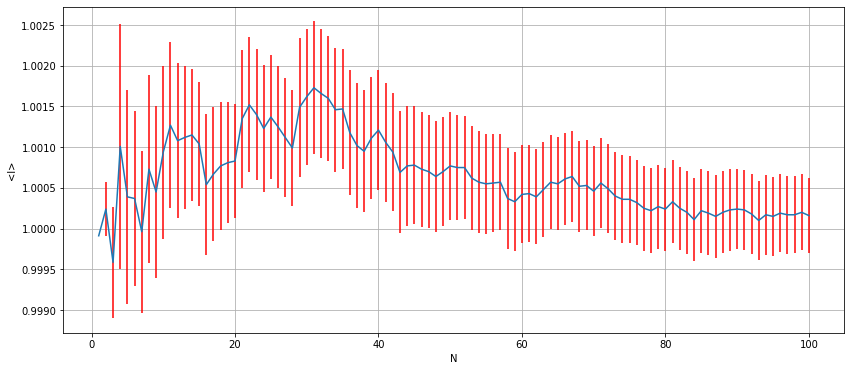

In [3]:
Nblocks,imps,var_imps = np.loadtxt("es02_1/es2.out", usecols=(0,1,2) , delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(Nblocks,imps,yerr=var_imps**0.5, ecolor='red')
plt.xlabel('N')
plt.ylabel('<I>')
plt.grid(True)
plt.show()

Osservando la scala delle ascisse, noto che le deviazioni standard ottenute con l'importance sampling sono inferiori rispetto a quelle ottenute campionando x uniformemente, confermando l'efficacia del metodo.

The fit returns a constant a = 0.0025332249369620866


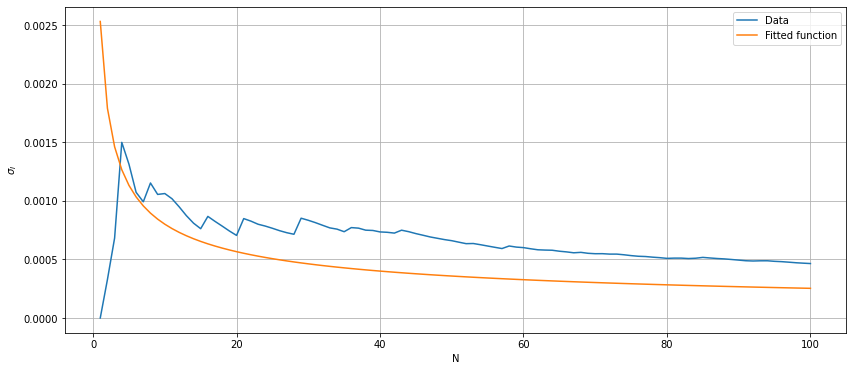

In [4]:
params, params_covariance = optimize.curve_fit(test_func, Nblocks, var_imps**0.5) 
print ('The fit returns a constant a =', params[0])

plt.figure(figsize=(14,6))
plt.plot(Nblocks,var_imps**0.5, label='Data')
plt.xlabel('N')
plt.ylabel('$\sigma_I$')
plt.grid(True)

plt.plot(Nblocks, test_func(Nblocks, params[0]),label='Fitted function')
plt.legend(loc='best')

plt.show()

Anche in questo caso l'andamento della deviazione standard rispecchia le attese. Confrontando con quanto ottenuto campionando uniformemente x al punto 1, noto che i valori di $\sigma$ risultano inferiori di circa un fattore 2.

## Esercizio 2

### Punto 1

Simulo un random walk discreto, e rappresento $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ in funzione del numero di step considerati. Per ogni valore di $N_{steps}$, eseguo 10000 simulazioni da cui estraggo tale valore medio e la sua deviazione standard.

Oltre ai dati, sul grafico mostro anche il best fit con una curva del tipo $f(N) = k \sqrt{N}$. 

Per calcolare la deviazione standard, è necessaria una propagazione dell'errore:

$$
\sigma_{\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}} = \frac{\partial \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}}{\partial \langle |\vec{r}_N|^2 \rangle_{RW}} \sigma_{\langle |\vec{r}_N|^2 \rangle_{RW}} = \frac{\sigma_{\langle |\vec{r}_N|^2 \rangle_{RW}}}{2\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}}
$$

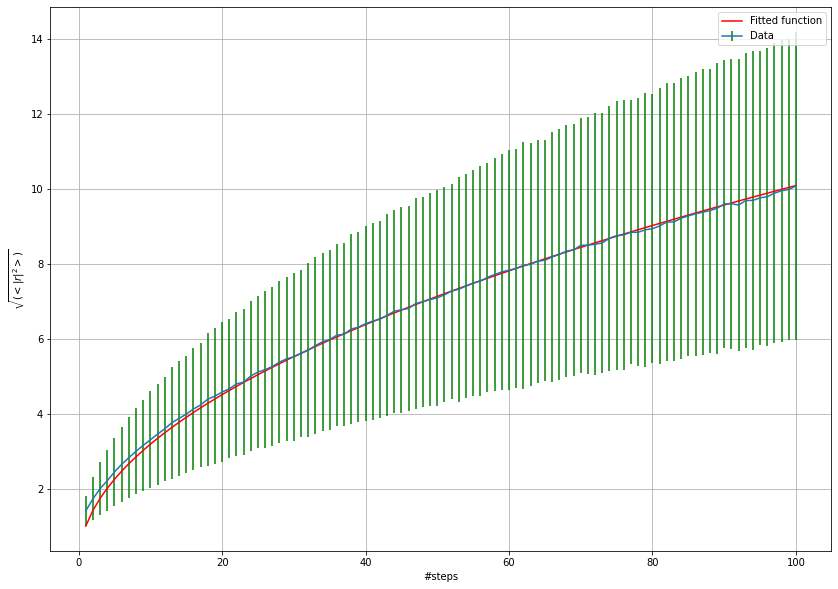

In [5]:
i,f,stdev = np.loadtxt("es02_2/es1.txt", usecols=(0,1,2) , delimiter=',', unpack='true')

def test_func(x, a):
    return a * np.sqrt(x)

params = optimize.curve_fit(test_func, i, f, p0=[1])

plt.figure(figsize=(14,10))
plt.errorbar(i,f,yerr=stdev, ecolor='green', label='Data')
plt.plot(i, test_func(i, params[0]),label='Fitted function', color='red')
plt.legend(loc='best')
plt.xlabel('#steps')
plt.ylabel(r'$\sqrt{(<|r|^2>)}$')
plt.grid(True)
plt.show()

Osservo che una funzione del tipo $f(N) = k \sqrt{N}$ presenta un ottimo accordo con i dati.

### Punto 2

Ora simulo un random walk continuo. Campiono $\phi$ e $\theta$ semplicemente generando dei numeri random rispettivamente in $[0,2\pi]$ e $[0,\pi]$, che utilizzo poi per calcolare le coordinate cartesiane. 

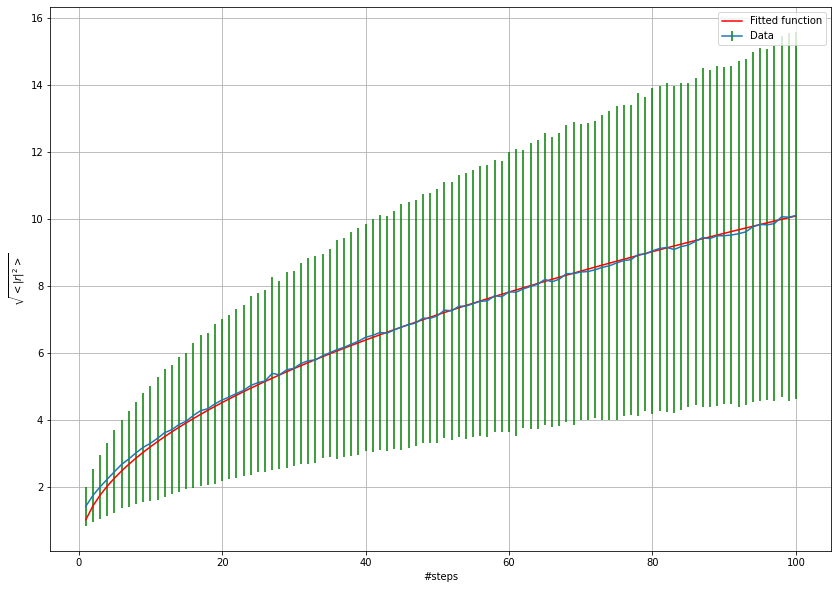

In [6]:
i,f,stdev = np.loadtxt("es02_2/es2.txt", usecols=(0,1,2) , delimiter=',', unpack='true')

params = optimize.curve_fit(test_func, i, f, p0=[1])

plt.figure(figsize=(14,10))
plt.errorbar(i,f,yerr=stdev, ecolor='green', label= 'Data')
plt.plot(i, test_func(i, params[0]),label='Fitted function', color='red')
plt.legend(loc='best')
plt.xlabel('#steps')
plt.ylabel(r'$\sqrt{<|r|^2>}$')
plt.grid(True)
plt.show()

Anche in questo caso, c'è un ottimo accordo con la funzione di fit. 

In entrambi i casi, si può osservare come emerga un __comportamento diffusivo__: la distanza di un insieme di punti dopo un gran numero di spostamenti random non è nulla; le particelle tendono a occupare una sempre maggiore regione dello spazio a disposizione, all'aumentare del tempo. Tuttavia, questa diffusione risulta sempre più smorzata all'aumentare del numero di passi temporali.
